<a href="https://colab.research.google.com/github/serega-sergei/SpringBoard_ML/blob/main/Siarhei_Siryk_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Project: Logistic Regression**


https://github.com/springboard-curriculum/guild-mle-projects/blob/main/Student_MLE_MiniProject_Logistic_Regression.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

**Load the breast cancer data into a Pandas dataframe and create variables for the features and target.**

In [7]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

**Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a heatmap of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!**

In [15]:
# Split into feature and target variables
X = data.data  # Features
y = data.target  # Target variable

# To check basic info about the dataset
print("Dataset dimensions:", X.shape)
print("Number of classes:", len(set(y)))
print("Feature names:", data.feature_names[:5], "...")  # First 5 feature names
print("Target names:", data.target_names)

Dataset dimensions: (569, 30)
Number of classes: 2
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...
Target names: ['malignant' 'benign']
Target column (first 10 values):
[0 0 0 0 0 0 0 0 0 0]

Target column with class names (first 10 values):
Sample 1: 0 (malignant)
Sample 2: 0 (malignant)
Sample 3: 0 (malignant)
Sample 4: 0 (malignant)
Sample 5: 0 (malignant)
Sample 6: 0 (malignant)
Sample 7: 0 (malignant)
Sample 8: 0 (malignant)
Sample 9: 0 (malignant)
Sample 10: 0 (malignant)
Malignant cases: 212
Benign cases: 357


In [18]:
# Print with corresponding class names for better readability
print("\nTarget column with class names (first 10 values):")
for i in range(10):
    print(f"Sample {i+1}: {y[i]} ({data.target_names[y[i]]})")


Target column with class names (first 10 values):
Sample 1: 0 (malignant)
Sample 2: 0 (malignant)
Sample 3: 0 (malignant)
Sample 4: 0 (malignant)
Sample 5: 0 (malignant)
Sample 6: 0 (malignant)
Sample 7: 0 (malignant)
Sample 8: 0 (malignant)
Sample 9: 0 (malignant)
Sample 10: 0 (malignant)


In [19]:
# Count malignant and benign cases
malignant_count = sum(y == 0)  # 0 represents malignant
benign_count = sum(y == 1)     # 1 represents benign

print(f"Malignant cases: {malignant_count}")
print(f"Benign cases: {benign_count}")

Malignant cases: 212
Benign cases: 357


In [12]:
# View first 5 rows of the data
df = pd.DataFrame(X, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# How frequently does the positive target occur?

# Calculate frequency of positive target (malignant)
positive_count = sum(y == 1)  # Count of malignant cases
total_count = len(y)  # Total number of samples
positive_percentage = (positive_count / total_count) * 100

print(f"Positive class (malignant) count: {positive_count}")
print(f"Total samples: {total_count}")
print(f"Positive class percentage: {positive_percentage:.2f}%")

Positive class (malignant) count: 357
Total samples: 569
Positive class percentage: 62.74%


In [21]:
# Generate summary statistics for the data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


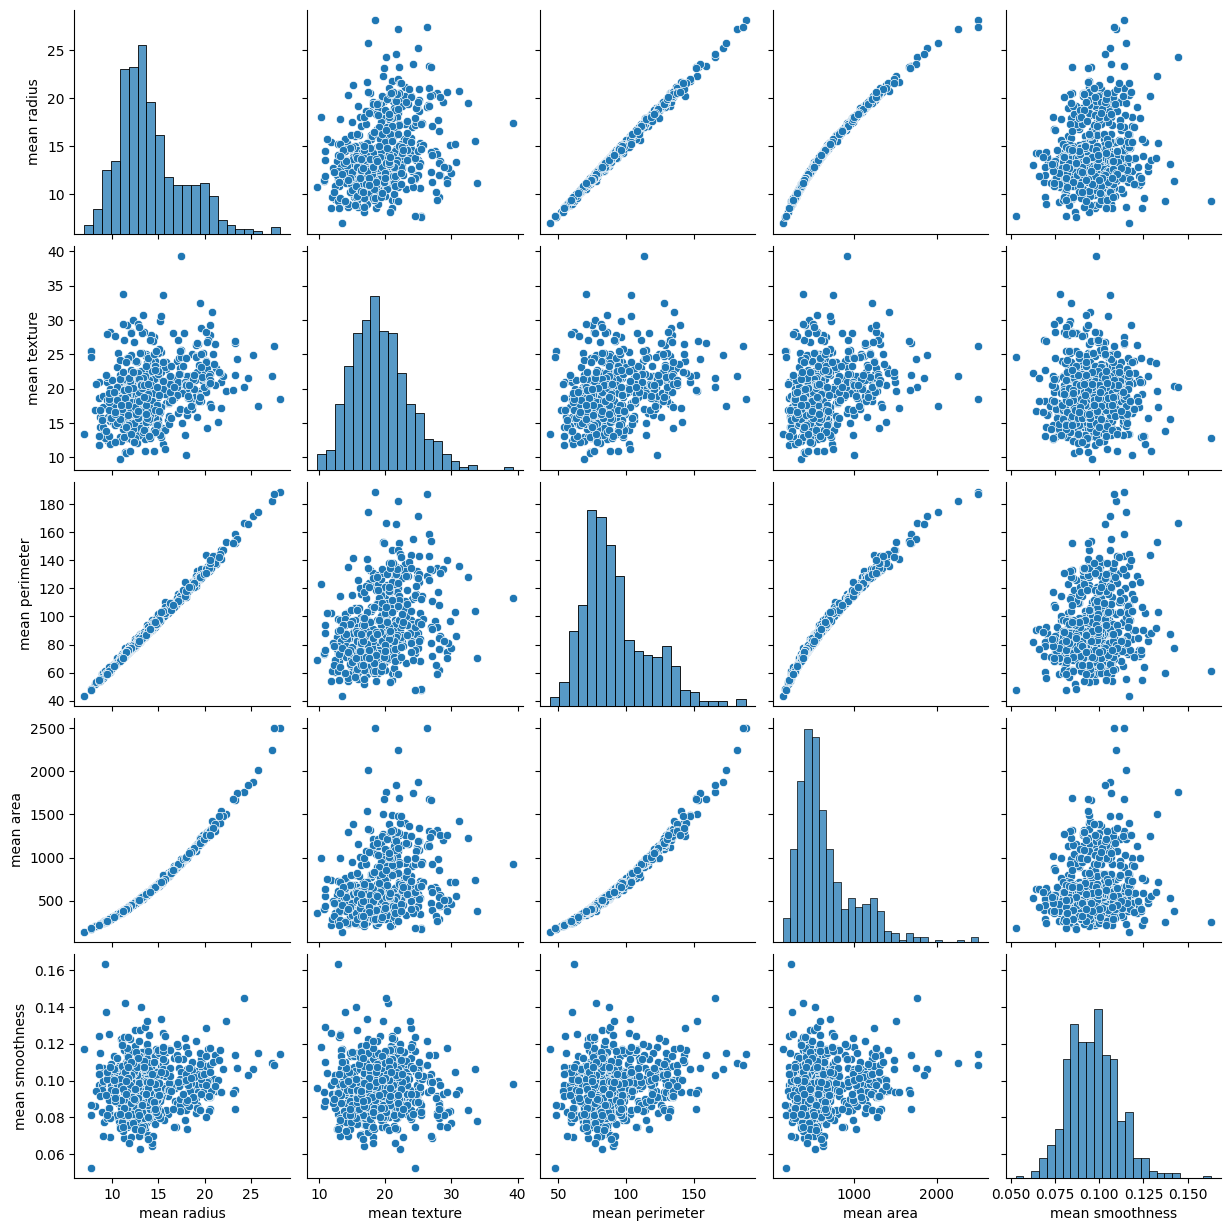

In [22]:
# Create a pairplot for the first few features

# Select the first few features (e.g., first 5 features)
selected_features = df.iloc[:, :5]  # Adjust number as needed

# Create the pairplot
sns.pairplot(selected_features)

# Show the plot
plt.show()

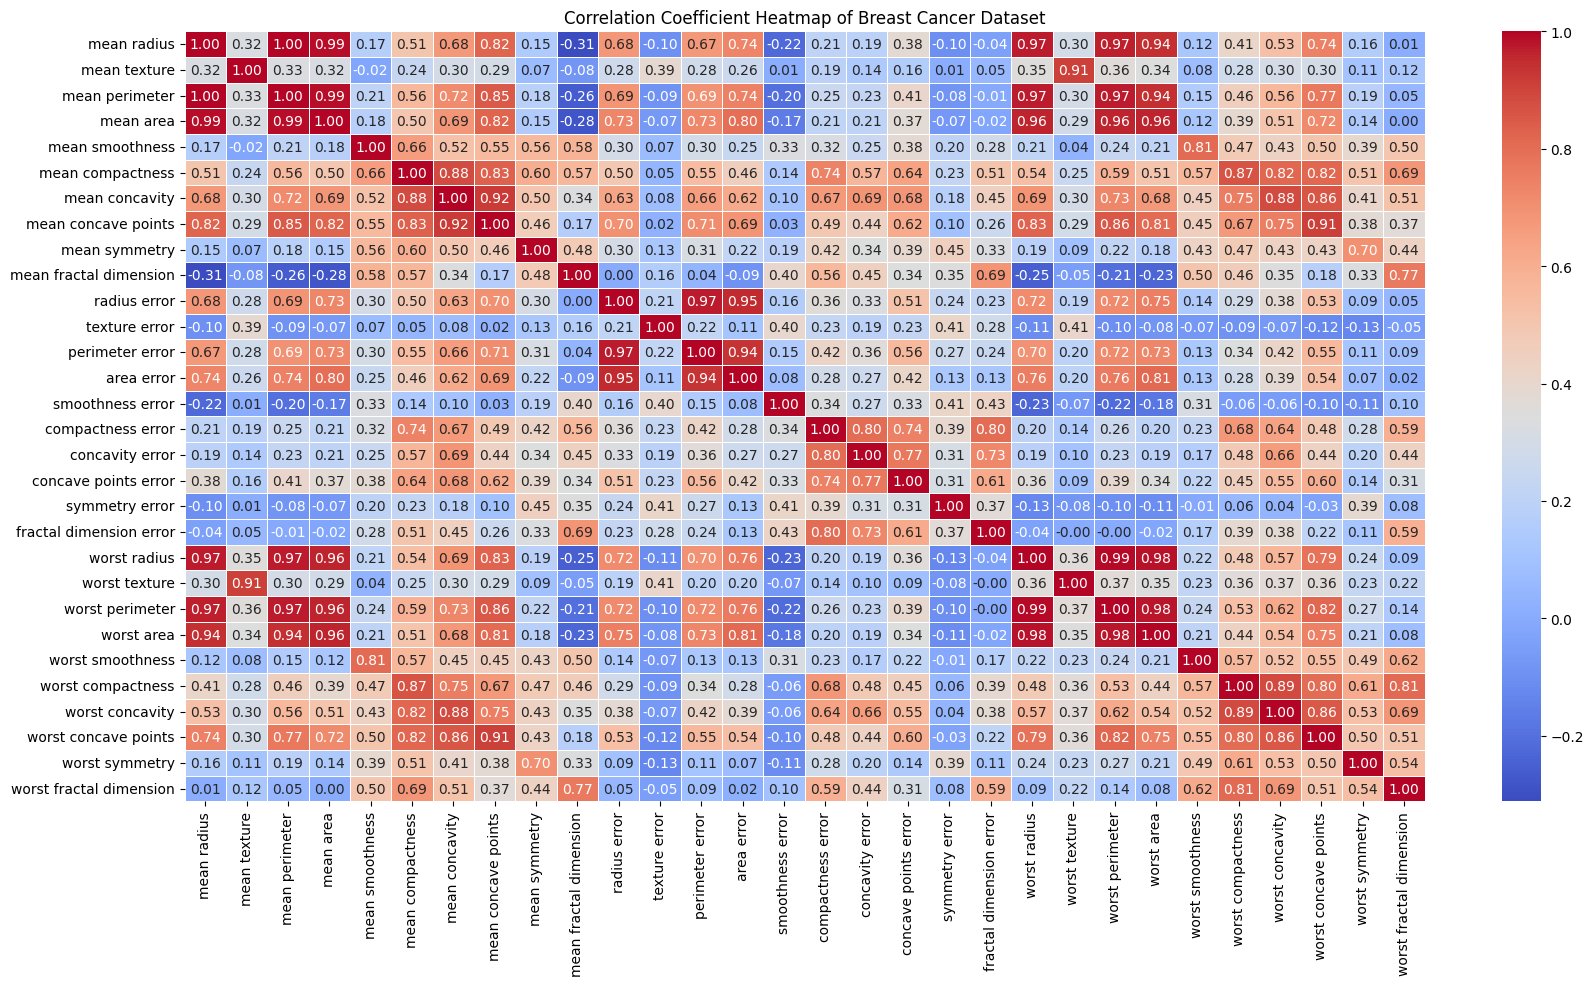

In [24]:
# Create a correlation coefficeint heatmap
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))  # Set the figure size
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Coefficient Heatmap of Breast Cancer Dataset")

# Show the plot
plt.show()

<ipython-input-25-a6aa286380b9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["target"], y=df["mean radius"], palette="coolwarm")


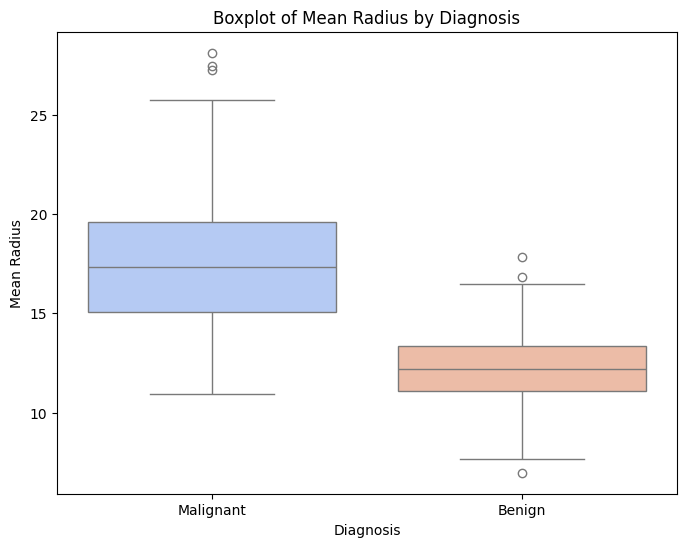

In [25]:
# Create a boxplot for mean radius by target type
# Add target column to DataFrame
df["target"] = data.target

# Create a boxplot for mean radius by target type
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["target"], y=df["mean radius"], palette="coolwarm")

# Adjust labels
plt.xticks(ticks=[0, 1], labels=["Malignant", "Benign"])
plt.xlabel("Diagnosis")
plt.ylabel("Mean Radius")
plt.title("Boxplot of Mean Radius by Diagnosis")

# Show the plot
plt.show()

**Use train_test_split to create a training and test sets for the data.**

In [26]:
# Define features (X) and target (y)
X = df.drop(columns=["target"])  # Features
y = df["target"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the training and test sets
print(f"Training set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set: X_test={X_test.shape}, y_test={y_test.shape}")

Training set: X_train=(455, 30), y_train=(455,)
Test set: X_test=(114, 30), y_test=(114,)


**Use LogisticRegression to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.**

In [32]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

**Use your model to make predictions on the test data.**

In [33]:
# Make predictions
y_pred = model.predict(X_test)

**Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?**

False Positives (FP): 3
False Negatives (FN): 2


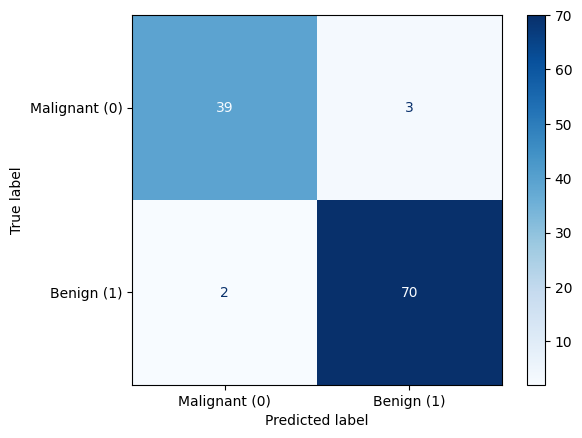

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant (0)", "Benign (1)"])
disp.plot(cmap="Blues", values_format="d")

# Extract FP and FN values
tn, fp, fn, tp = cm.ravel()
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

**Use classification_report to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.**

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Model Accuracy: 0.9561

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**Extract the model coefficients from your trained model.**

In [38]:
# Extract model coefficients and intercept
coefficients = model.coef_[0]  # Logistic Regression stores coefficients as a nested array
intercept = model.intercept_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    "Feature": data.feature_names,
    "Coefficient": coefficients
})

# Sort coefficients by magnitude for better interpretation
coef_df = coef_df.reindex(coef_df["Coefficient"].abs().sort_values(ascending=False).index)

# Display results
print(f"Intercept: {intercept:.4f}")
print(coef_df)


Intercept: 0.3648
                    Feature  Coefficient
0               mean radius     1.930357
26          worst concavity    -1.579116
25        worst compactness    -1.180527
20             worst radius     1.145734
11            texture error     1.117543
28           worst symmetry    -0.756250
27     worst concave points    -0.618344
6            mean concavity    -0.593762
5          mean compactness    -0.381326
7       mean concave points    -0.303860
21            worst texture    -0.298255
8             mean symmetry    -0.266197
24         worst smoothness    -0.265378
4           mean smoothness    -0.145564
29  worst fractal dimension    -0.115528
22          worst perimeter    -0.098451
13               area error    -0.085857
1              mean texture     0.071456
2            mean perimeter    -0.050393
16          concavity error    -0.049932
18           symmetry error    -0.048083
17     concave points error    -0.038320
9    mean fractal dimension    -0.02898

**Normalize the coefficients by the standard deviation of each feature in the training data.**

In [40]:
# Compute the standard deviation of each feature in the training set
feature_std = X_train.std(axis=0)  # Standard deviation across samples

# Normalize the coefficients
normalized_coefficients = coefficients / feature_std

# Create a DataFrame for better visualization
norm_coef_df = pd.DataFrame({
    "Feature": data.feature_names,
    "Normalized Coefficient": normalized_coefficients
})

# Display results
print(norm_coef_df)


                                         Feature  Normalized Coefficient
mean radius                          mean radius                0.551628
mean texture                        mean texture                0.016221
mean perimeter                    mean perimeter               -0.002087
mean area                              mean area               -0.000005
mean smoothness                  mean smoothness              -10.816398
mean compactness                mean compactness               -7.124712
mean concavity                    mean concavity               -7.263413
mean concave points          mean concave points               -7.806396
mean symmetry                      mean symmetry               -9.481854
mean fractal dimension    mean fractal dimension               -4.048255
radius error                        radius error               -0.052392
texture error                      texture error                1.955378
perimeter error                  perimeter error   

**Sort feature names and coefficients by absolute value of coefficients.**

In [41]:
# Sort by absolute value for better interpretation
norm_coef_df = norm_coef_df.reindex(norm_coef_df["Normalized Coefficient"].abs().sort_values(ascending=False).index)

# Display results
print(norm_coef_df)

                                         Feature  Normalized Coefficient
worst smoothness                worst smoothness              -11.768336
worst symmetry                    worst symmetry              -11.702220
mean smoothness                  mean smoothness              -10.816398
mean symmetry                      mean symmetry               -9.481854
worst concave points        worst concave points               -9.258867
mean concave points          mean concave points               -7.806396
worst compactness              worst compactness               -7.383740
worst concavity                  worst concavity               -7.312871
mean concavity                    mean concavity               -7.263413
mean compactness                mean compactness               -7.124712
worst fractal dimension  worst fractal dimension               -6.276089
concave points error        concave points error               -6.092406
symmetry error                    symmetry error   

**Visualize the feature importances by creating a horizontal bar chart using e.g. barh. Based on magnitude, what appears to be the most important predictor of cancer in this dataset?**

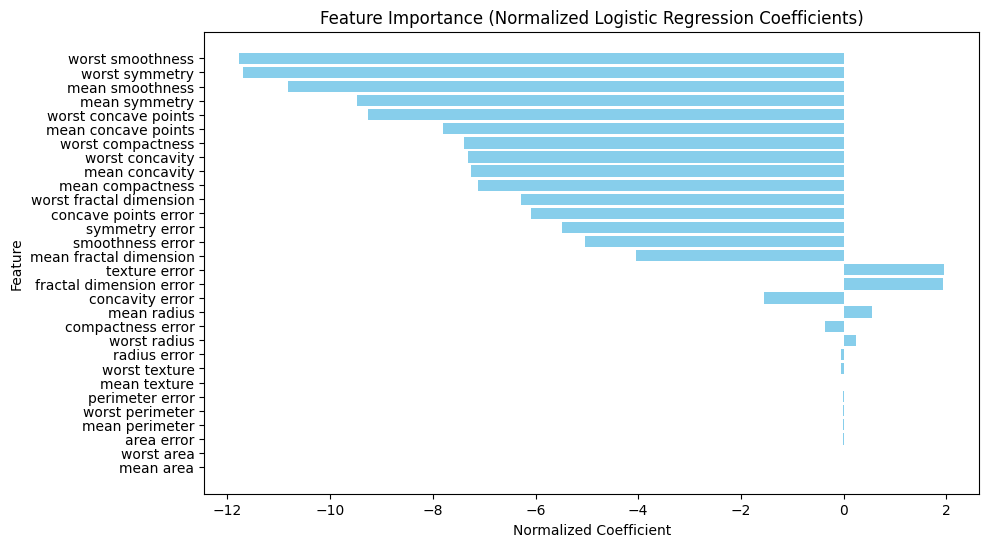

In [42]:
import matplotlib.pyplot as plt

# Plot the normalized coefficients as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(norm_coef_df["Feature"], norm_coef_df["Normalized Coefficient"], color="skyblue")
plt.xlabel("Normalized Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance (Normalized Logistic Regression Coefficients)")
plt.gca().invert_yaxis()  # Invert y-axis so the most important feature is on top
plt.show()


**So worst smoothness is the most important feature that indcates malignant tumors.**